<a href="https://colab.research.google.com/github/regis-zang/melhores_insights_ml/blob/main/notebooks/eda_diagnostica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# notebooks/eda_diagnostica.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/sales.csv")

In [5]:
# Converte corretamente a coluna de data (formato dd-mm-yyyy)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

In [6]:
# Ajustes adicionais
df["Fuel_Price"] = df["Fuel_Price"] / 1000
df["Unemployment"] = df["Unemployment"] / 1000

In [7]:
# Checa dados convertidos
print(df.dtypes)
print(df.head())

Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object
        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0 2010-02-05    1643690.90             0        42.31       2.572  211.096358   
1 2010-02-12    1641957.44             1        38.51       2.548  211.242170   
2 2010-02-19    1611968.17             0        39.93       2.514  211.289143   
3 2010-02-26    1409727.59             0        46.63       2.561  211.319643   
4 2010-03-05    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106  


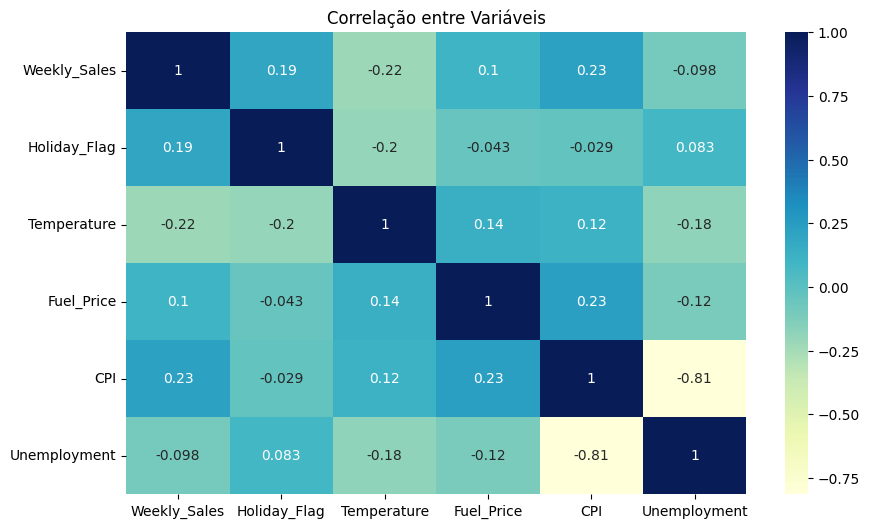

In [8]:
# Heatmap de correlação
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlação entre Variáveis")
plt.show()

💻 Código completo para tendência e médias móveis


/tmp/ipython-input-2417950986.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


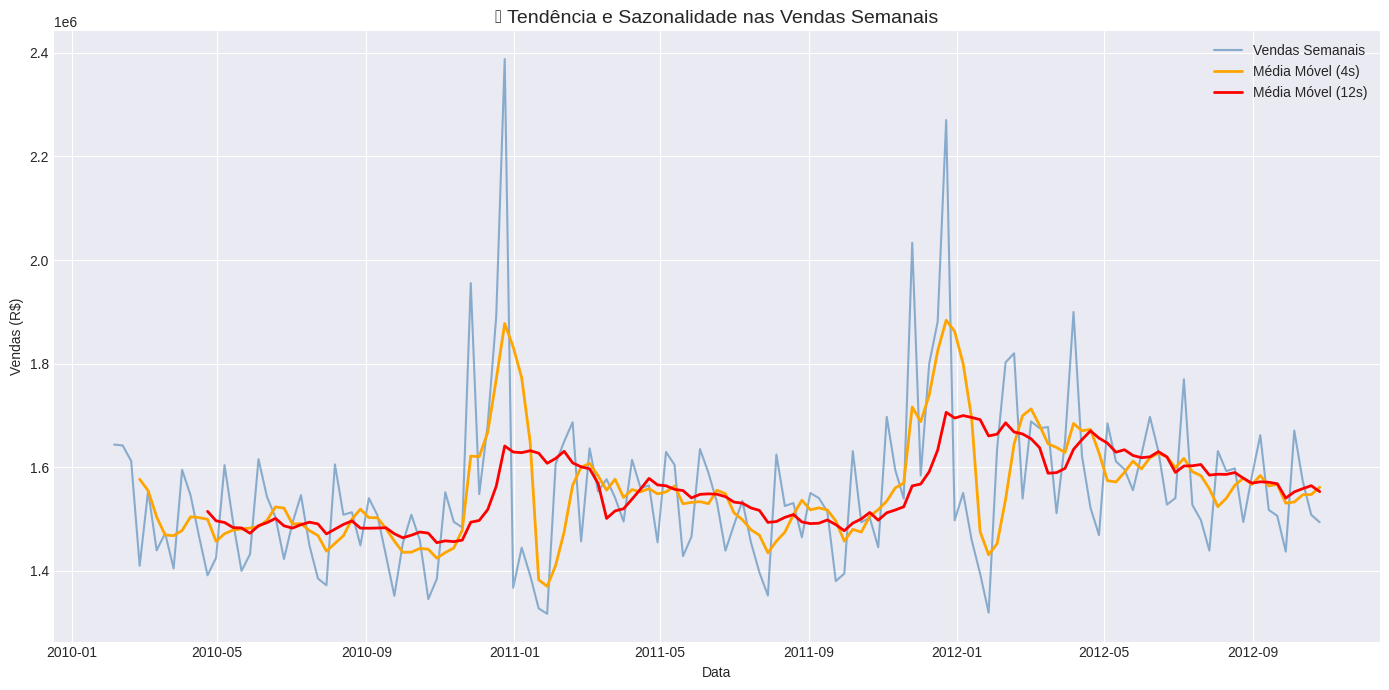

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurações de estilo visual
plt.style.use("seaborn-v0_8-darkgrid")

# Garante a ordenação temporal
df = df.sort_values("Date")

# Criação de médias móveis (4 e 12 semanas)
df["MA_4"] = df["Weekly_Sales"].rolling(window=4).mean()
df["MA_12"] = df["Weekly_Sales"].rolling(window=12).mean()

# Plot principal
plt.figure(figsize=(14,7))
plt.plot(df["Date"], df["Weekly_Sales"], label="Vendas Semanais", color="steelblue", alpha=0.6)
plt.plot(df["Date"], df["MA_4"], label="Média Móvel (4s)", color="orange", linewidth=2)
plt.plot(df["Date"], df["MA_12"], label="Média Móvel (12s)", color="red", linewidth=2)
plt.title("📈 Tendência e Sazonalidade nas Vendas Semanais", fontsize=14)
plt.xlabel("Data")
plt.ylabel("Vendas (R$)")
plt.legend()
plt.tight_layout()
plt.show()


🧩 Bônus — destacar feriados no gráfico

/tmp/ipython-input-4222138589.py:13: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


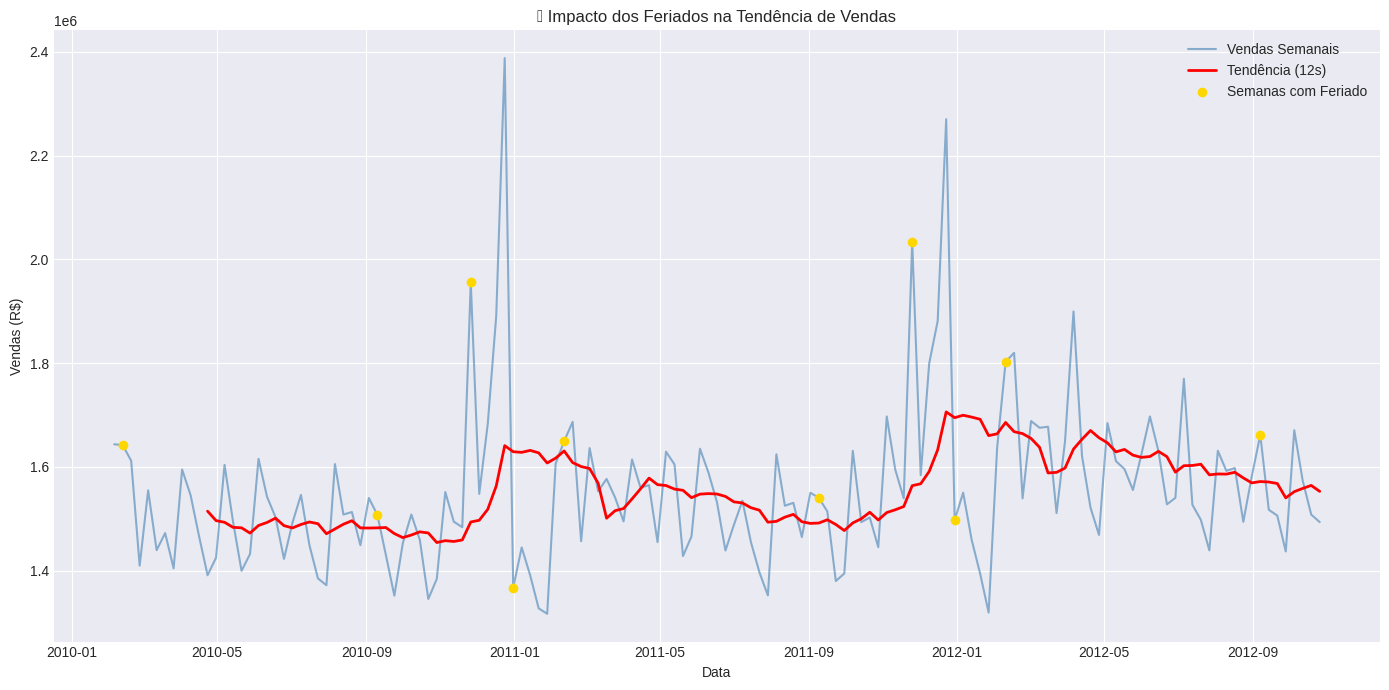

In [10]:
plt.figure(figsize=(14,7))
plt.plot(df["Date"], df["Weekly_Sales"], label="Vendas Semanais", color="steelblue", alpha=0.6)
plt.plot(df["Date"], df["MA_12"], label="Tendência (12s)", color="red", linewidth=2)

# Destaca feriados
holiday_weeks = df[df["Holiday_Flag"] == 1]
plt.scatter(holiday_weeks["Date"], holiday_weeks["Weekly_Sales"], color="gold", label="Semanas com Feriado", zorder=5)

plt.title("🎉 Impacto dos Feriados na Tendência de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas (R$)")
plt.legend()
plt.tight_layout()
plt.show()


🖼️ Versão Executiva com Destaques e Anotações

/tmp/ipython-input-3218449673.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3218449673.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3218449673.py:41: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s)

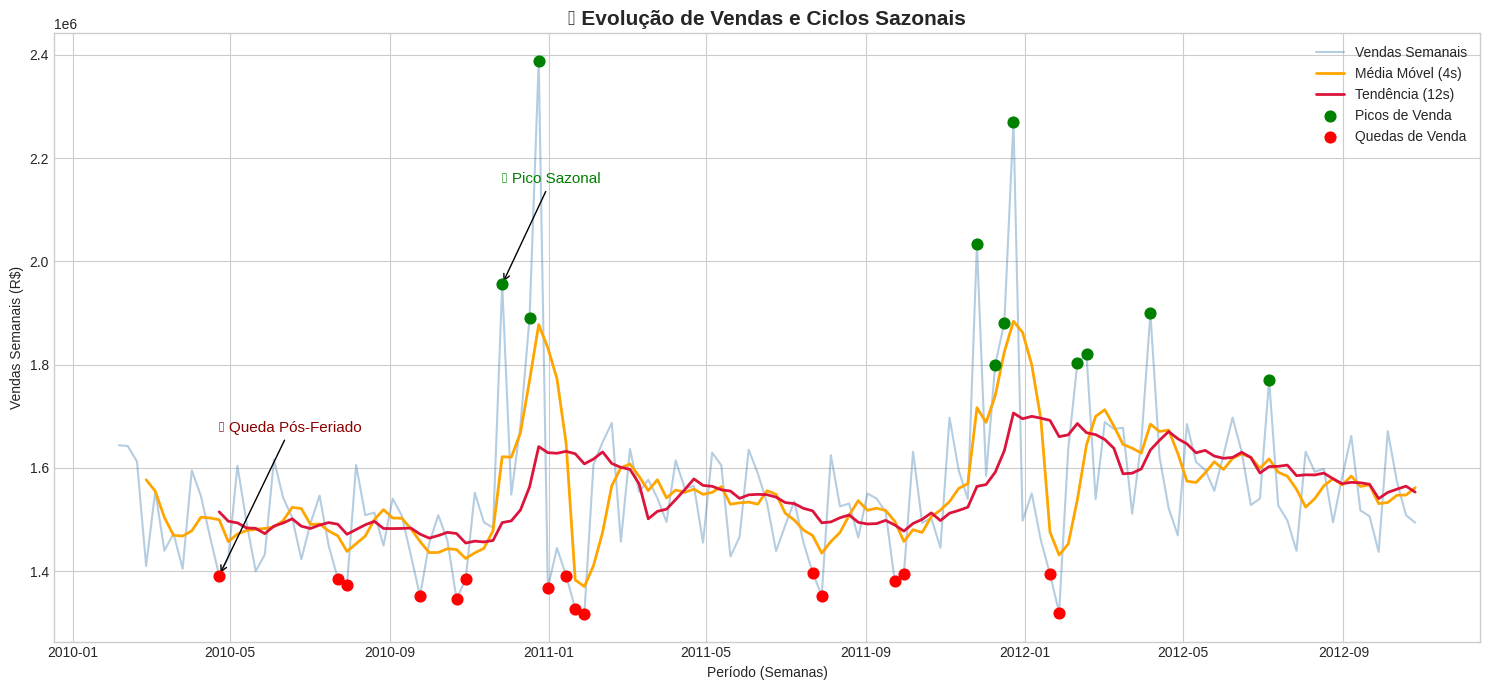

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Identificar picos e vales
peak_threshold = df["Weekly_Sales"].mean() + df["Weekly_Sales"].std()
low_threshold = df["Weekly_Sales"].mean() - df["Weekly_Sales"].std()

peaks = df[df["Weekly_Sales"] > peak_threshold]
lows = df[df["Weekly_Sales"] < low_threshold]

plt.figure(figsize=(15,7))

# Linhas de tendência
plt.plot(df["Date"], df["Weekly_Sales"], label="Vendas Semanais", color="steelblue", alpha=0.4)
plt.plot(df["Date"], df["MA_4"], label="Média Móvel (4s)", color="orange", linewidth=2)
plt.plot(df["Date"], df["MA_12"], label="Tendência (12s)", color="crimson", linewidth=2)

# Marcar picos e vales
plt.scatter(peaks["Date"], peaks["Weekly_Sales"], color="green", s=60, label="Picos de Venda", zorder=5)
plt.scatter(lows["Date"], lows["Weekly_Sales"], color="red", s=60, label="Quedas de Venda", zorder=5)

# Anotações automáticas
if not peaks.empty:
    plt.annotate("📈 Pico Sazonal", xy=(peaks["Date"].iloc[0], peaks["Weekly_Sales"].iloc[0]),
                 xytext=(peaks["Date"].iloc[0], peaks["Weekly_Sales"].iloc[0]*1.1),
                 arrowprops=dict(facecolor="green", arrowstyle="->"), fontsize=11, color="green")

if not lows.empty:
    plt.annotate("📉 Queda Pós-Feriado", xy=(lows["Date"].iloc[0], lows["Weekly_Sales"].iloc[0]),
                 xytext=(lows["Date"].iloc[0], lows["Weekly_Sales"].iloc[0]*1.2),
                 arrowprops=dict(facecolor="red", arrowstyle="->"), fontsize=11, color="darkred")

# Estilo e título
plt.title("📊 Evolução de Vendas e Ciclos Sazonais", fontsize=15, weight="bold")
plt.xlabel("Período (Semanas)")
plt.ylabel("Vendas Semanais (R$)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
🧩 Etapa B — Agrupamentos (Clustering K-Means ou DBSCAN)


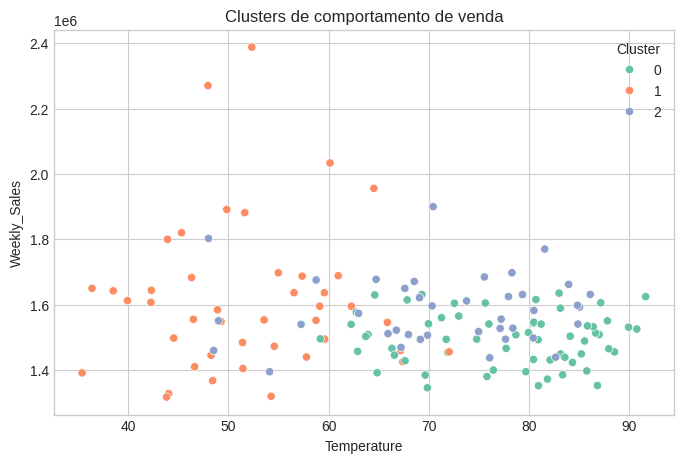

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleciona variáveis relevantes
X = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

# Normaliza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Teste inicial de 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualização
plt.figure(figsize=(8,5))
sns.scatterplot(x="Temperature", y="Weekly_Sales", hue="Cluster", data=df, palette="Set2")
plt.title("Clusters de comportamento de venda")
plt.show()


🧩 1️⃣ Gráfico de Dispersão com Linha de Tendência

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

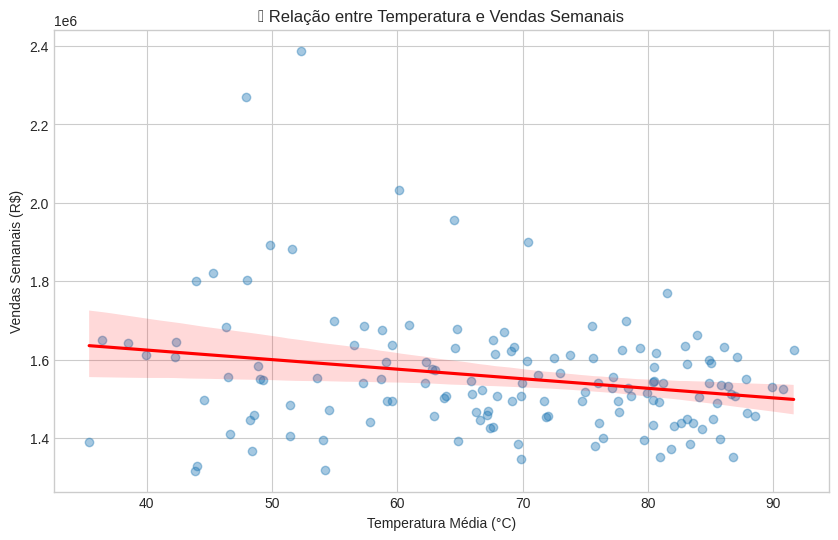

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(x="Temperature", y="Weekly_Sales", data=df, scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
plt.title("📉 Relação entre Temperatura e Vendas Semanais")
plt.xlabel("Temperatura Média (°C)")
plt.ylabel("Vendas Semanais (R$)")
plt.show()


🧮 2️⃣ Boxplot de Vendas por Faixa de Temperatura


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

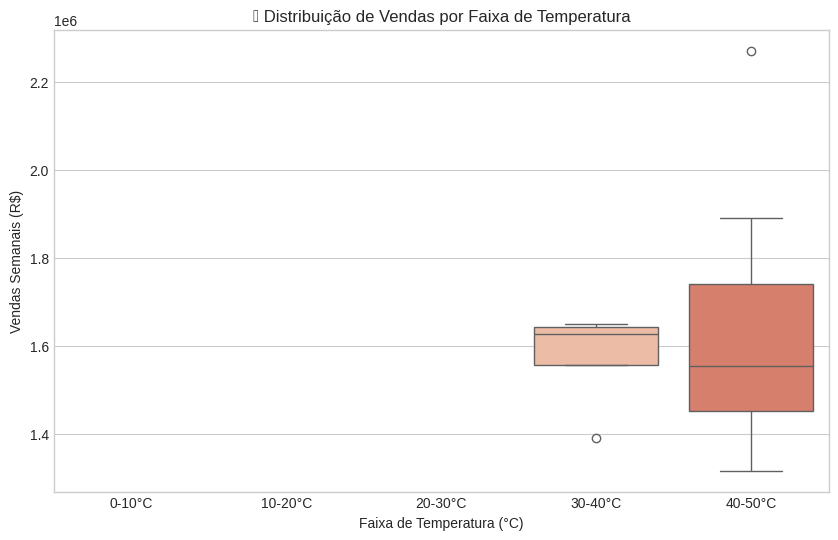

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [16]:
df["Faixa_Temp"] = pd.cut(df["Temperature"], bins=[0, 10, 20, 30, 40, 50],
                          labels=["0-10°C", "10-20°C", "20-30°C", "30-40°C", "40-50°C"])

plt.figure(figsize=(10,6))
sns.boxplot(x="Faixa_Temp", y="Weekly_Sales", data=df, palette="coolwarm")
plt.title("📦 Distribuição de Vendas por Faixa de Temperatura")
plt.xlabel("Faixa de Temperatura (°C)")
plt.ylabel("Vendas Semanais (R$)")
plt.show()
